<a href="https://colab.research.google.com/github/arianza1210/Data_Scientist/blob/main/timeseries_rnn_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install mpl_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
#import library
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(20,8)
import pandas as pd
import numpy  as np
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import statsmodels.api as sm

In [25]:
time_series_df=pd.read_csv('/content/dc.csv',
                           sep=',',
                           index_col=0,
                           parse_dates=[0])

In [26]:
time_series_df.head()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


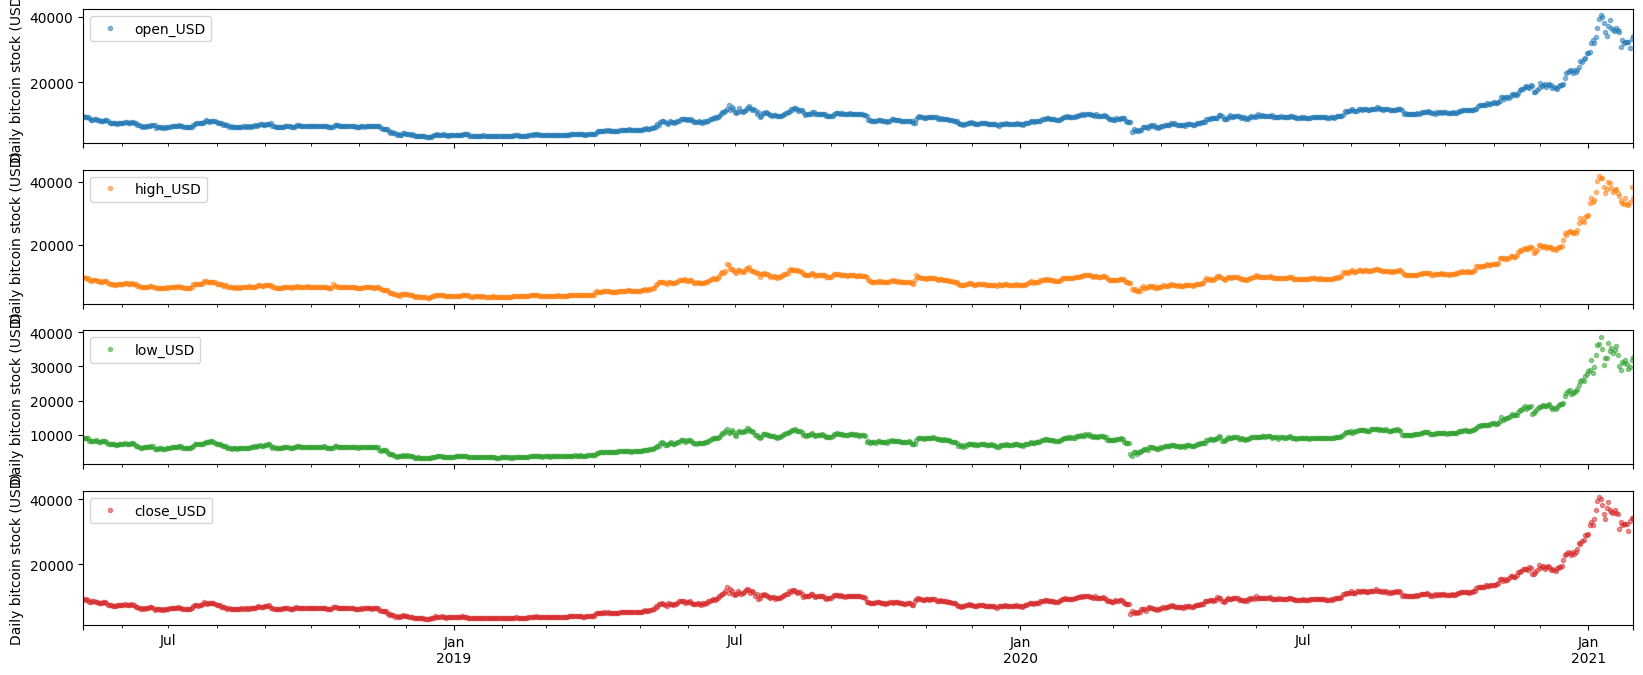

In [28]:
#ploting
cols_plot=['open_USD','high_USD','low_USD','close_USD']
axes = time_series_df[cols_plot].plot(marker='.',alpha=0.5,linestyle='None',subplots=True)
for ax in axes:
  ax.set_ylabel('Daily bitcoin stock (USD)')

Text(0, 0.5, 'Daily bitcoin stock (USD)')

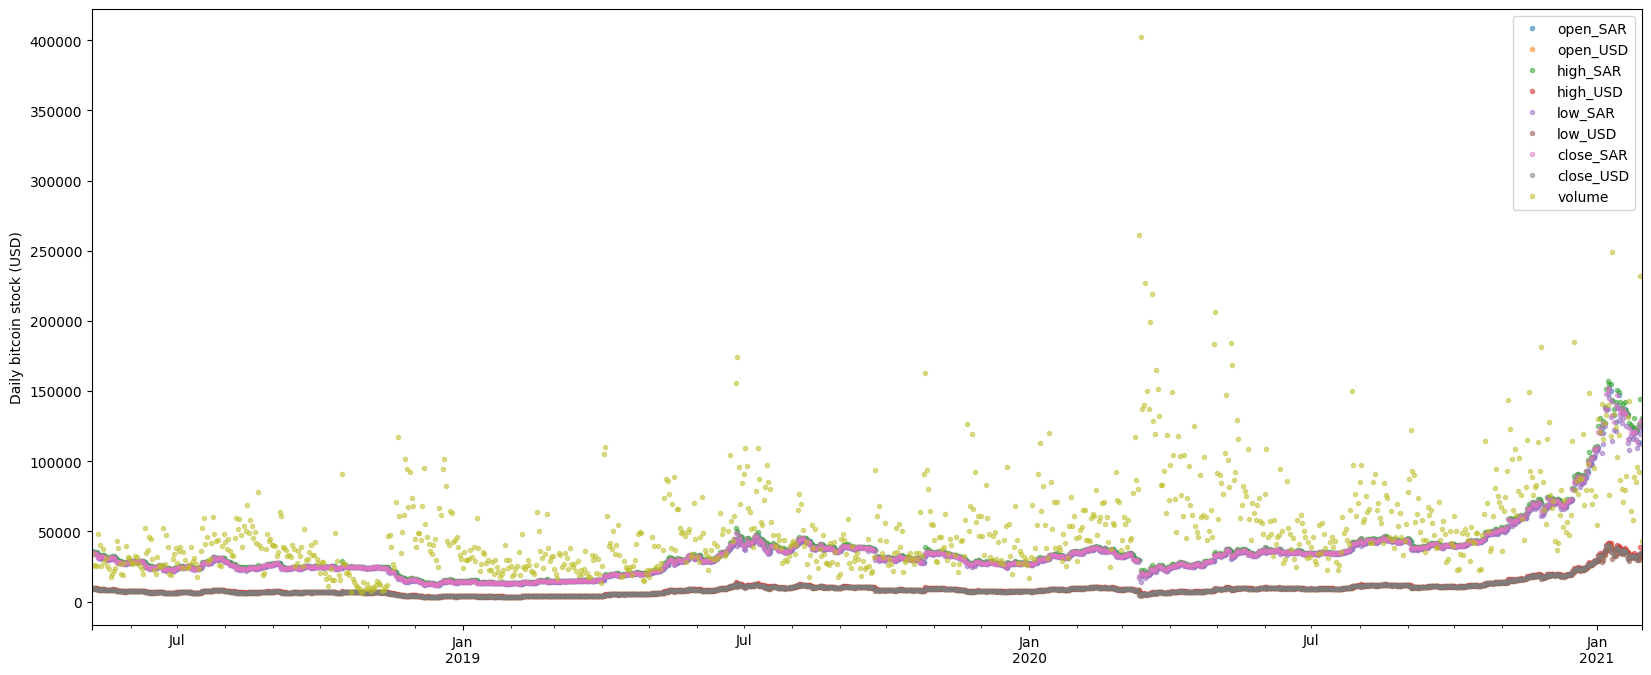

In [29]:
axes=time_series_df.plot(marker='.', alpha=0.5, linestyle='None')
plt.ylabel('Daily bitcoin stock (USD)')

In [32]:
open_USD=time_series_df['open_USD'].to_numpy()
high_USD=time_series_df['high_USD'].to_numpy()
low_USD=time_series_df['low_USD'].to_numpy()
close_USD=time_series_df['close_USD'].to_numpy()


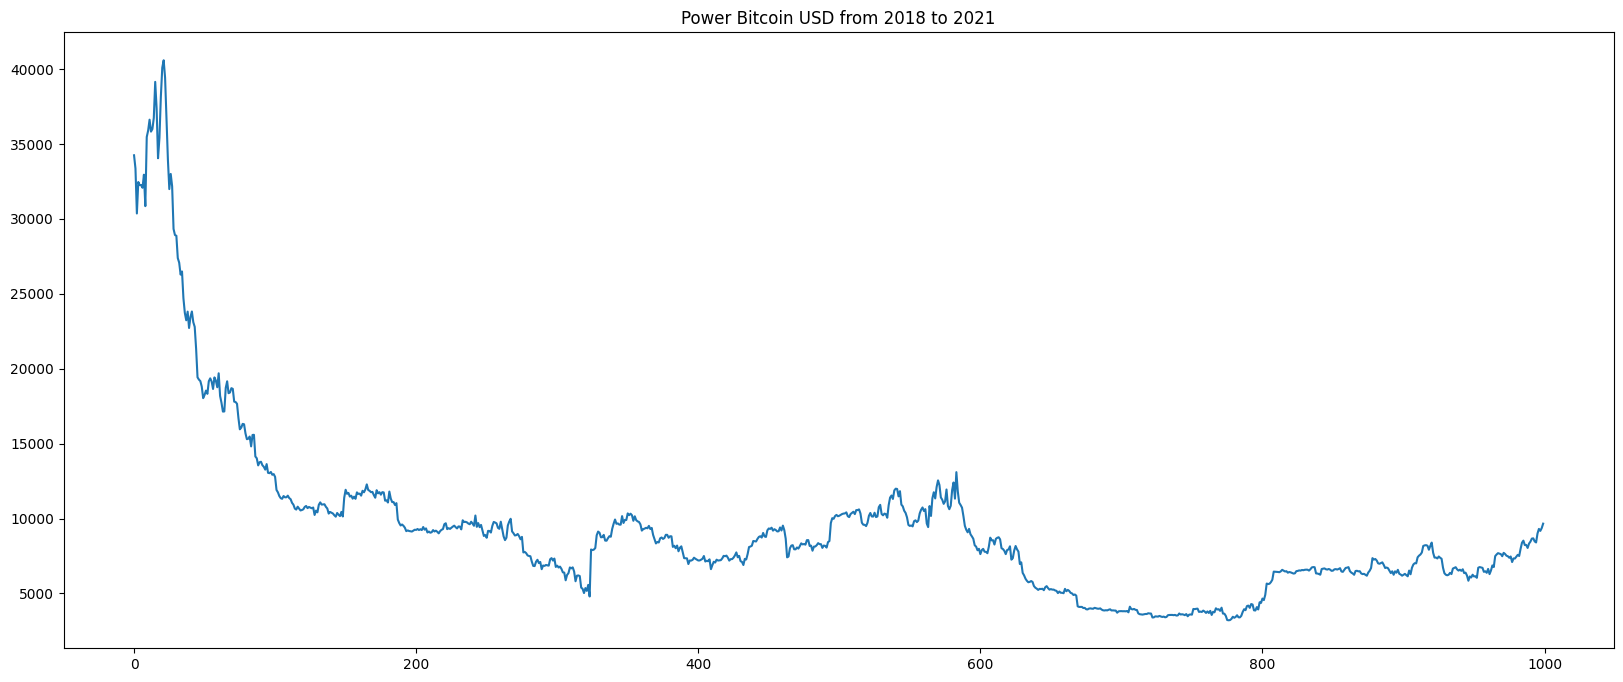

In [39]:
plt.title('Power Bitcoin USD from 2018 to 2021')
plt.plot(open_USD)

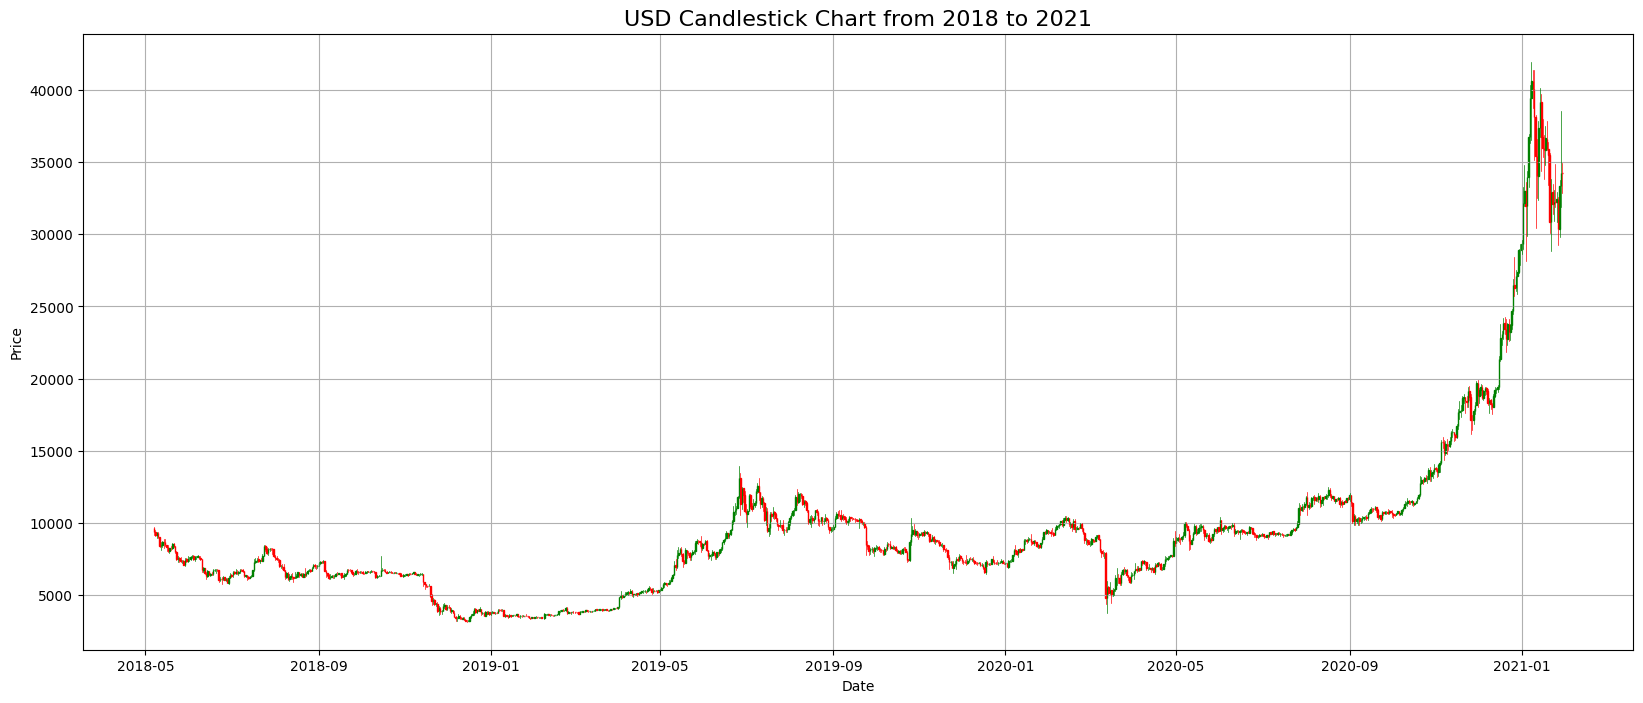

In [42]:
ohlc = []
for i in range(len(time_series_df)):
    ohlc.append((mdates.date2num(time_series_df.index[i]), open_USD[i], high_USD[i], low_USD[i], close_USD[i]))


fig, ax = plt.subplots()
candlestick_ohlc(ax, ohlc, width=0.4, colorup='green', colordown='red')
ax.xaxis_date()


plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.title('USD Candlestick Chart from 2018 to 2021',size=16)


plt.show()


<ipython-input-43-3eb5192d06f9>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  decomposition = sm.tsa.seasonal_decompose(time_series_df['2019']['open_USD'],model='additive')


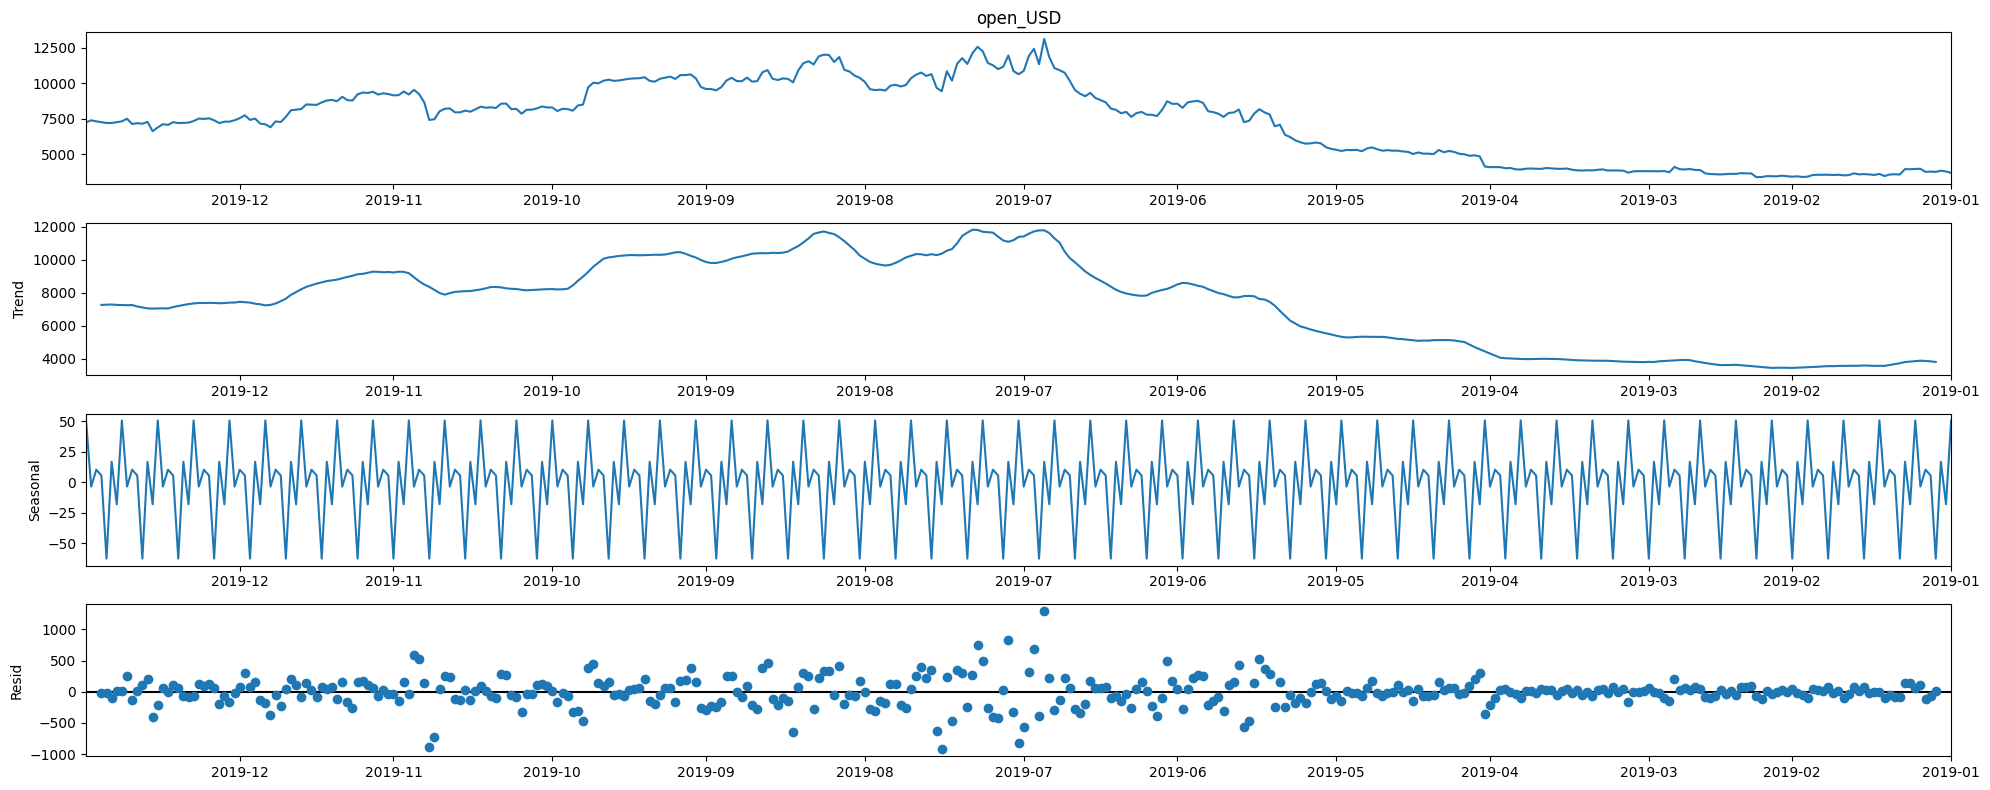

In [43]:
#statistical methods
decomposition = sm.tsa.seasonal_decompose(time_series_df['2019']['open_USD'],model='additive')
decomposition.plot();

In [46]:
#split a univariate sequence into samples
def split_seq(sequence,n_steps_in,n_steps_out):
   X,y=list(),list()
   for i in range(len(sequence)):
     end_ix= i + n_steps_in
     out_end_ix= end_ix + n_steps_out
     if out_end_ix > len(sequence):
       break
     seq_x,seq_y=sequence[i:end_ix],sequence[end_ix:out_end_ix]
     X.append(seq_x)
     y.append(seq_y)
   return np.array(X),np.array(y)


In [47]:
n_steps_in=30
n_steps_out=1

In [50]:
X, Y = split_seq(open_USD, n_steps_in, n_steps_out)
X.shape, Y.shape

((970, 30), (970, 1))

In [51]:
X[0], Y[0]

(array([34246.28, 33368.18, 30362.19, 32464.01, 32254.19, 32259.45,
        32078.  , 32950.  , 30851.99, 35468.23, 35901.94, 36622.46,
        35824.99, 35994.98, 36737.43, 39145.21, 37371.38, 34049.15,
        35410.37, 38150.02, 40088.22, 40586.96, 39432.48, 36769.36,
        33949.53, 31989.75, 33000.05, 32176.45, 29331.7 , 28923.63]),
 array([28875.55]))

In [52]:
# reshape from [samples, timesteps] to [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(970, 30, 1)

In [53]:
X_train = X[:-365]
Y_train = Y[:-365]

X_test = X[-365:]
Y_test = Y[-365:]

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((605, 30, 1), (605, 1), (365, 30, 1), (365, 1))

In [55]:
#Rolling mean baseline
def rolling_mean_baseline(history):
  return np.mean(history, axis=1)

In [58]:
Y_pred_baseline_rolling=rolling_mean_baseline(X)
Y_pred_baseline_rolling.shape

(970, 1)

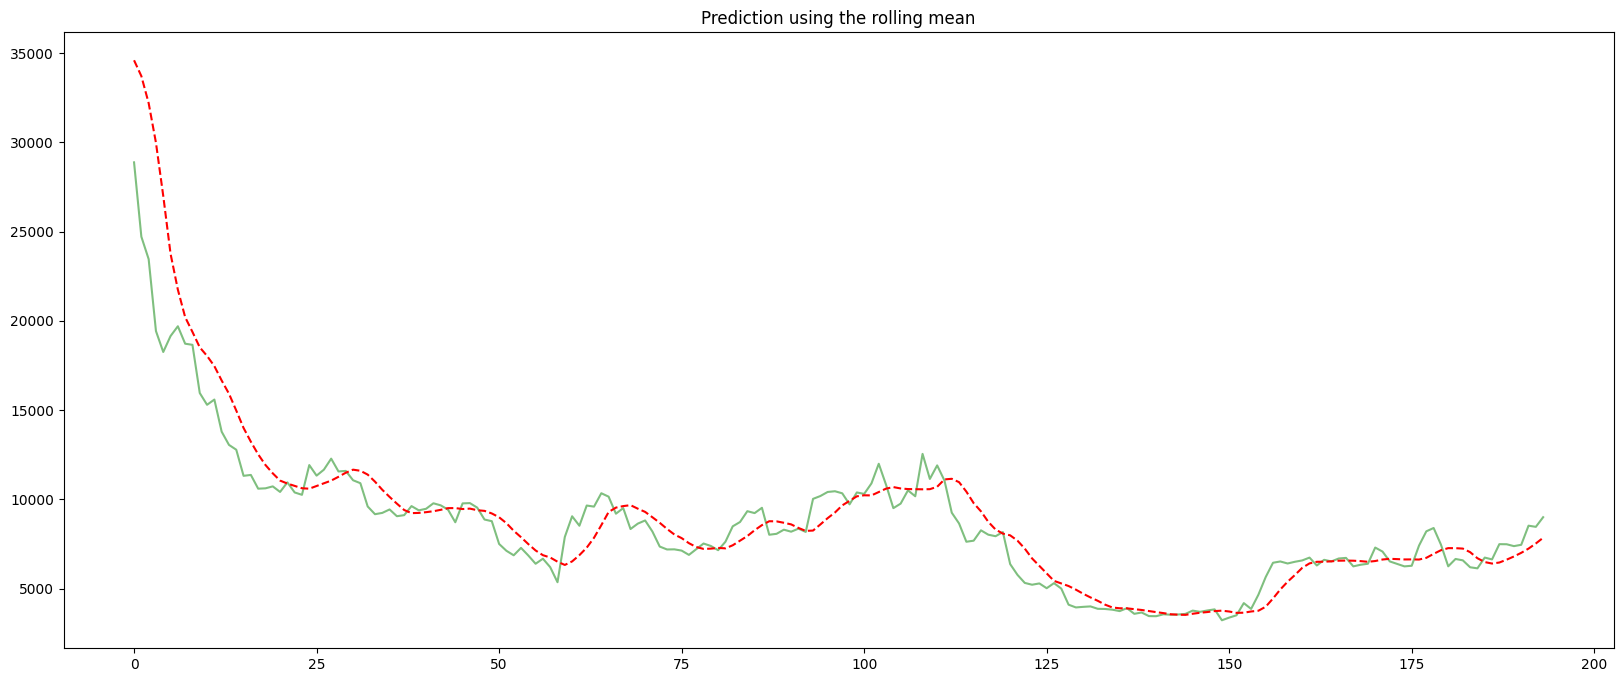

In [59]:
# this gets really crowded, using a stride, makes it more readable
stride = 5


plt.plot(open_USD[n_steps_in::stride], alpha=0.5, color='g')
plt.plot(Y_pred_baseline_rolling[::stride], color='r', ls='dashed')

plt.title('Prediction using the rolling mean');